FOR DELIVERY-TIME PREDICTION MODEL

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [23]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [24]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


EDA ON DATASET

<ipython-input-25-20913f614dd5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery Time'])
<ipython-input-25-20913f614dd5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

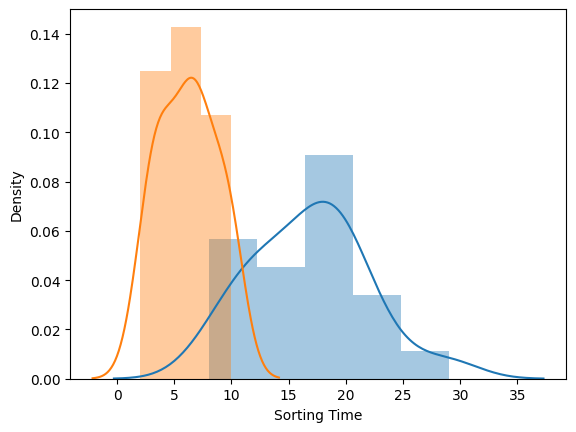

In [25]:
#correlation matrix
sns.distplot(df['Delivery Time'])
sns.distplot(df['Sorting Time'])


In [26]:
#renaming columns
df1 = df.rename({'Delivery Time': 'delivery_time','Sorting Time': 'sorting_time'},axis=1)

In [27]:
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [28]:
#correlation matrix
df1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

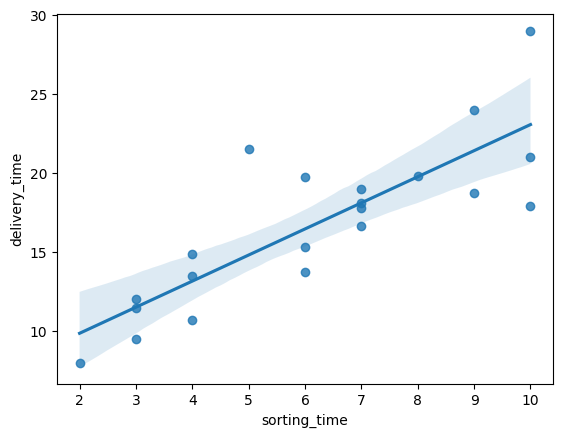

In [29]:
sns.regplot(x=df1['sorting_time'],y=df1['delivery_time'])

In [30]:
#model building
model = smf.ols("delivery_time~sorting_time",data=df1).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        14:09:23   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#model testing

#finding coefficient value
model.params
#finding tvalues and pvalues
model.tvalues
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [33]:
#finding r-squared values
model.rsquared


0.6822714748417231

In [34]:
#model prediction
#manual prediction say sorting time 5
delivery_time = (6.582)+(1.6490)*5
delivery_time

14.827000000000002

In [35]:
#automatic prediction
#automatic prediction say soting time is 6,4
df2 = pd.Series([6,4])
df2

0    6
1    4
dtype: int64

In [36]:
#predicting the data
data_pred = pd.DataFrame(df2,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,4


In [37]:
model.predict(data_pred)

0    16.476853
1    13.178814
dtype: float64

BUILD A PREDICT MODEL FOR SALARY_HIKE

In [38]:
df3 = pd.read_csv("Salary_Data.csv")

In [39]:
df3.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


EDA AND DATA VISUALIZATION

In [40]:

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<ipython-input-42-1e2b5460faae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['YearsExperience'])
<ipython-input-42-1e2b5460faae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

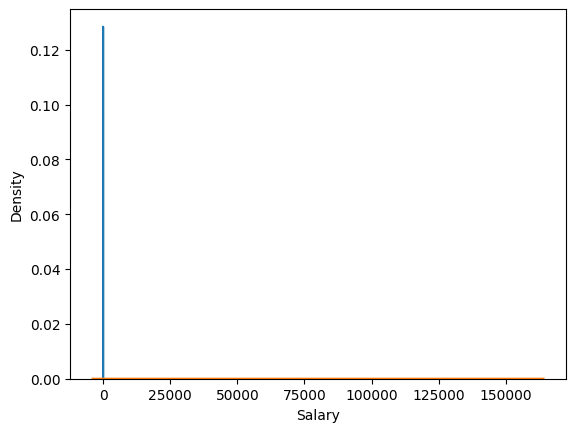

In [42]:
sns.distplot(df3['YearsExperience'])
sns.distplot(df3['Salary'])

In [43]:
#RENAMING COLUMNS
df4 = df3.rename({'YearsExperience':'experience years'},axis=1)
df4

,experience years,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [44]:
#correlation matrix
df4.corr()

,experience years,Salary
experience years,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='experience years', ylabel='Salary'>

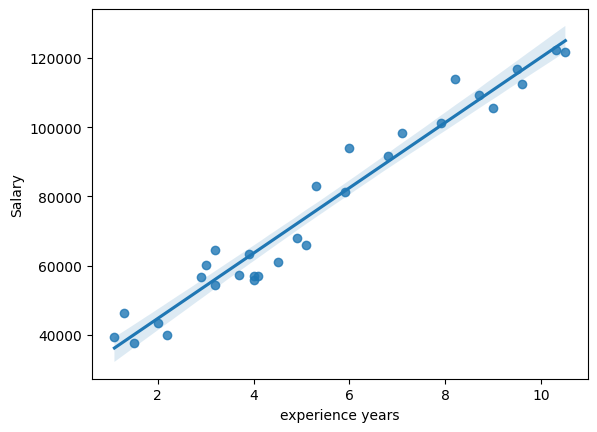

In [45]:
sns.regplot(x=df4['experience years'],y=df4['Salary'])

In [46]:
#biuld model
model1 = smf.ols("Salary~YearsExperience",data=df3).fit()

In [47]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        14:10:14   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#coefficient values
model.params

# pvalues,tvalues
model.pvalues
model.tvalues

#rsquared values
model.rsquared


0.6822714748417231

In [49]:
#model prediction
#model prediction for say 3 years of exp
Salary = (25.456)+(40.56)*3
Salary

147.136

In [50]:
#automatic prediction for say sorting time is 2,5
new_data = pd.Series([2,5])
new_data

0    2
1    5
dtype: int64

In [51]:
data_pred = pd.DataFrame(new_data,columns = ['YearsExperience'])
data_pred

,YearsExperience
0,2
1,5
